# Proyecto final

### Álvaro Andrés Esquivel Gómez  -  11002822




y = f(x) = mx +b

y = la variable dependiente
x = variable independiente
m = pendiente de la recta(parámetro del modelo)
b = intercepto(parámetro del modelo)

Tanto “x” como “y” son parte del dataset usado , “m” y “b” son parámetros del modelo los cuales **buscamos estimar con los datos**, esto significa que se busca encontrar que valores de “m” y “b” producen una recta que describa de la mejor manera posible la relación entre los datos “x” y “y”.


Por lo tanto en el proyecto:
y = el precio de venta real de cierta casa
x = cierta característica de cierta casa
yhat = f(x) = precio estimado o predicción del precio de venta para una casa con
cierta característica x
m = pendiente de la recta que usamos para aproximar el precio de la casa yhat
b = intercepto de la recta que usamos para aproximar el precio de la casa yhat

In [160]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#Importando los datos
data = np.load("proyecto_training_data.npy")

print("Rango del tensor:",data.ndim) 
print("Forma o tamaño:",data.shape) 
print(data)
len_data = len(data)
print("\nCantidad de datos:",len_data)


Rango del tensor: 2
Forma o tamaño: (1460, 6)
[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]

Cantidad de datos: 1460


In [3]:
#Asignacion de variables de entrenamiento y de validacion usando sclicing
datos_entrenamiento = data[0:int(len_data*0.8)]


datos_validacion = data[int(len_data*0.8):len_data]


print("Datos entrenamiento: ", datos_entrenamiento, "\n\nlen datos_entrenamiento: ", len(datos_entrenamiento),
      "\n\nDatos validacion: ", datos_validacion, "\n\nlen datos_validacion: ", len(datos_validacion))

print("Forma datos_entrenamiento:",datos_entrenamiento.shape) 
print("Forma datos_entrenamiento:",datos_validacion.shape) 

Datos entrenamiento:  [[2.0850e+05 7.0000e+00 8.5600e+02 8.0000e+00 2.0030e+03 6.5000e+01]
 [1.8150e+05 6.0000e+00 1.2620e+03 6.0000e+00 1.9760e+03 8.0000e+01]
 [2.2350e+05 7.0000e+00 9.2000e+02 6.0000e+00 2.0010e+03 6.8000e+01]
 ...
 [2.3317e+05 7.0000e+00 1.5020e+03 7.0000e+00 2.0090e+03 7.9000e+01]
 [2.4535e+05 8.0000e+00 1.6940e+03 7.0000e+00 2.0080e+03 6.4000e+01]
 [1.7300e+05 6.0000e+00 9.5900e+02 7.0000e+00 2.0000e+03 5.8000e+01]] 

len datos_entrenamiento:  1168 

Datos validacion:  [[2.35000e+05 6.00000e+00 1.23600e+03 7.00000e+00 1.93500e+03 1.20000e+02]
 [6.25000e+05 1.00000e+01 1.83100e+03 1.00000e+01 1.99500e+03 1.18000e+02]
 [1.71000e+05 6.00000e+00 1.11800e+03 6.00000e+00 1.97700e+03 7.60000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]] 

len datos_validacion:  292
Forma datos_entrena

Para cada variable en el dataset calcular((usando numpy):
* media
* valor máximo
* valor mínimo
* rango(peak to peak, no el rango del tensor que por ser vector
sabemos que es 1)
* desviación estándar
* Para cada variable en el dataset usar seaborn(función distplot https://seaborn.pydata.org/generated/seaborn.distplot.html) para graficar un histograma de la variable.

Media precio:  180590.27739726027
Precio maximo:  755000.0
Precio minimo:  34900.0
Rango entre minimo y maximo: 720100.0
Desviacion precio: 78781.95108033362


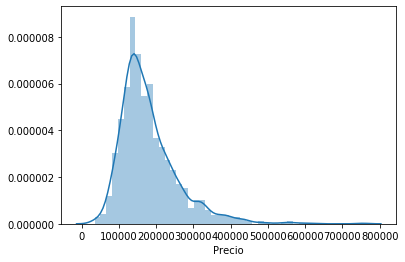

In [4]:
#Variables de dataset entrenamiento
precio = datos_entrenamiento[:,0]
calidad_materiales = datos_entrenamiento[:,1]
pies_primer_nivel = datos_entrenamiento[:,2]
cantidad_cuartos = datos_entrenamiento[:,3]
anio_construccion = datos_entrenamiento[:,4]
pies_calle_n = datos_entrenamiento[:,5]
pies_calle = pies_calle_n[np.logical_not(np.isnan(pies_calle_n))]

print("Media precio: ", np.nanmean(precio))
print("Precio maximo: ", np.nanmax(precio))
print("Precio minimo: ", np.nanmin(precio))
print("Rango entre minimo y maximo:", np.ptp(precio))
print("Desviacion precio:", np.std(precio))

x_var = pd.Series(precio, name="Precio")
ax = sns.distplot(x_var)

Valor media de calidad: 6.101027397260274
Valor maximo de calidad: 10.0
Valor minimo de calidad: 1.0
Rango de calidad: 9.0
Desviacion de calidad: 1.377435193240741


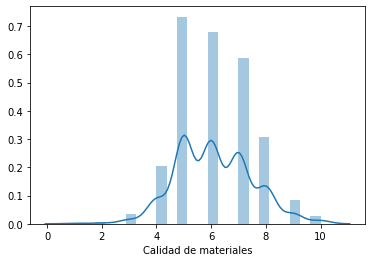

In [5]:
print("Valor media de calidad:", np.nanmean(calidad_materiales))
print("Valor maximo de calidad:", np.nanmax(calidad_materiales))
print("Valor minimo de calidad:", np.nanmin(calidad_materiales))
print("Rango de calidad:", np.ptp(calidad_materiales))
print("Desviacion de calidad:", np.std(calidad_materiales))

x_var = pd.Series(calidad_materiales, name="Calidad de materiales")
ax = sns.distplot(x_var)

Valores de pies cuadrados en el primer nivel
Valor de media: 1156.3236301369864
Valor maximo: 3228.0
Valor minimo: 334.0
Rango entre valor maximo y minimo: 2894.0
Desviacion: 373.620331503586


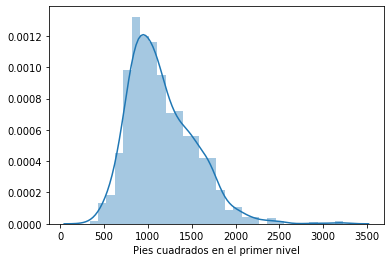

In [17]:
print("Valores de pies cuadrados en el primer nivel")
print("Valor de media:", np.nanmean(pies_primer_nivel))
print("Valor maximo:", np.nanmax(pies_primer_nivel))
print("Valor minimo:", np.nanmin(pies_primer_nivel))
print("Rango entre valor maximo y minimo:", np.ptp(pies_primer_nivel))
print("Desviacion:", np.std(pies_primer_nivel))

x_var = pd.Series(pies_primer_nivel, name="Pies cuadrados en el primer nivel")
ax = sns.distplot(x_var)

Valores de total de habitaciones
Valor de media: 6.4854452054794525
Valor maximo: 14.0
Valor minimo: 2.0
Rango entre valor maximo y minimo: 12.0
Desviacion: 1.6084517167387253


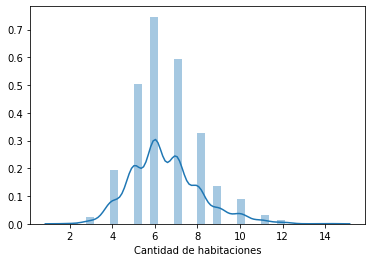

In [7]:
print("Valores de total de habitaciones")
print("Valor de media:", np.nanmean(cantidad_cuartos))
print("Valor maximo:", np.nanmax(cantidad_cuartos))
print("Valor minimo:", np.nanmin(cantidad_cuartos))
print("Rango entre valor maximo y minimo:", np.ptp(cantidad_cuartos))
print("Desviacion:", np.std(cantidad_cuartos))

x_var = pd.Series(cantidad_cuartos, name="Cantidad de habitaciones")
ax = sns.distplot(x_var)

Valores de año de construccion
Valor de media: 1971.451198630137
Valor maximo: 2010.0
Valor minimo: 1875.0
Rango entre valor maximo y minimo: 135.0
Desviacion: 29.93888206867768


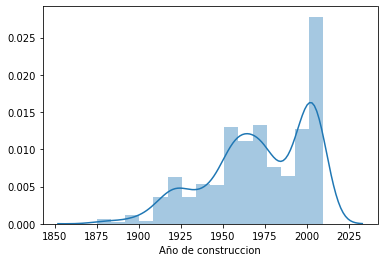

In [8]:
print("Valores de año de construccion")
print("Valor de media:", np.nanmean(anio_construccion))
print("Valor maximo:", np.nanmax(anio_construccion))
print("Valor minimo:", np.nanmin(anio_construccion))
print("Rango entre valor maximo y minimo:", np.ptp(anio_construccion))
print("Desviacion:", np.std(anio_construccion))

x_var = pd.Series(anio_construccion, name="Año de construccion")
ax = sns.distplot(x_var)

Pies lineales de calle conectados a la propiedad
Valor de media: 69.94698544698545
Valor maximo: 313.0
Valor minimo: 21.0
Rango entre valor maximo y minimo: 292.0
Desviacion: 23.4659548199304


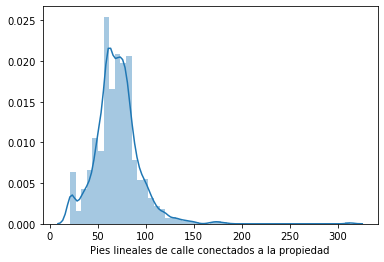

In [9]:
print("Pies lineales de calle conectados a la propiedad")
print("Valor de media:", np.nanmean(pies_calle))
print("Valor maximo:", np.nanmax(pies_calle))
print("Valor minimo:", np.nanmin(pies_calle))
print("Rango entre valor maximo y minimo:", np.ptp(pies_calle))
print("Desviacion:", np.std(pies_calle))

x_var = pd.Series(pies_calle, name="Pies lineales de calle conectados a la propiedad")
ax = sns.distplot(x_var)

En el proyecto:

y = el precio de venta real de cierta casa

x = cierta característica de cierta casa

yhat = f(x) = precio estimado o predicción del precio de venta para una casa con cierta característica x

m = pendiente de la recta que usamos para aproximar el precio de la casa yhat

b = intercepto de la recta que usamos para aproximar el precio de la casa yhat

m y b son conocidos como parámetros del modelo y son valores que necesitamos encontrar usando los datos x,y

Correlacion entre calidad de materiales y precio
Coeficiente:  0.7939900504626405


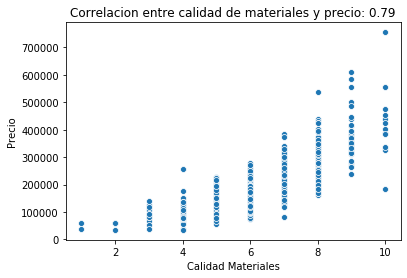

In [10]:
coefcorr_calidad_materiales = np.corrcoef(calidad_materiales, precio)[1,0]
print("Correlacion entre calidad de materiales y precio")
print("Coeficiente: ", coefcorr_calidad_materiales)
titulo = "Correlacion entre calidad de materiales y precio: " + str("%.2f" % round(coefcorr_calidad_materiales, 2))
dataset = pd.DataFrame({'Calidad Materiales': calidad_materiales, 'Precio': precio})
ax = sns.scatterplot(x="Calidad Materiales", y="Precio", data=dataset).set_title(titulo)

Correlacion entre pies en el primer nivel y precio
Coeficiente:  0.6162887000998717


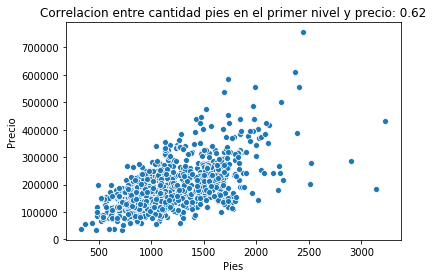

In [11]:
coefcorr_pies = np.corrcoef(pies_primer_nivel, precio)[1,0]
print("Correlacion entre pies en el primer nivel y precio")
print("Coeficiente: ", coefcorr_pies)
titulo = "Correlacion entre cantidad pies en el primer nivel y precio: " + str("%.2f" % round(coefcorr_pies, 2))
dataset = pd.DataFrame({'Pies': pies_primer_nivel, 'Precio': precio})
ax = sns.scatterplot(x="Pies", y="Precio", data=dataset).set_title(titulo)

Correlacion entre cantida de cuartos y precio
Coeficiente:  0.5647069399593065


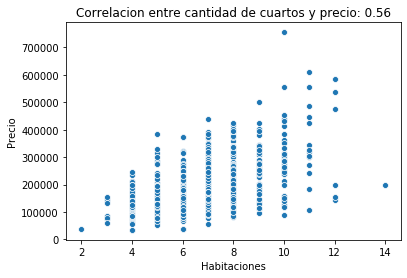

In [12]:
coefcorr_cuartos = np.corrcoef(cantidad_cuartos, precio)[1,0]
print("Correlacion entre cantida de cuartos y precio")
print("Coeficiente: ", coefcorr_cuartos)
titulo = "Correlacion entre cantidad de cuartos y precio: " + str("%.2f" % round(coefcorr_cuartos, 2))
dataset = pd.DataFrame({'Habitaciones': cantidad_cuartos, 'Precio': precio})
ax = sns.scatterplot(x="Habitaciones", y="Precio", data=dataset).set_title(titulo)

Correlacion entre año de construccion y precio
Coeficiente:  0.5647069399593065


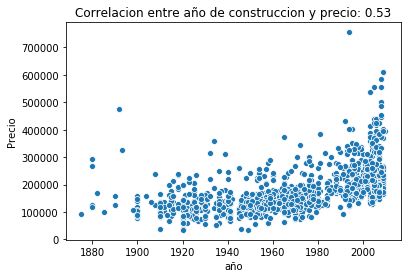

In [13]:
coefcorr_anio = np.corrcoef(anio_construccion, precio)[1,0]
print("Correlacion entre año de construccion y precio")
print("Coeficiente: ", coefcorr_cuartos)
titulo = "Correlacion entre año de construccion y precio: " + str("%.2f" % round(coefcorr_anio, 2))
dataset = pd.DataFrame({'año': anio_construccion, 'Precio': precio})
ax = sns.scatterplot(x="año", y="Precio", data=dataset).set_title(titulo)

Correlacion entre Pies lineales de calle conectados a la propiedad y precio
Coeficiente:  0.3632916166538923


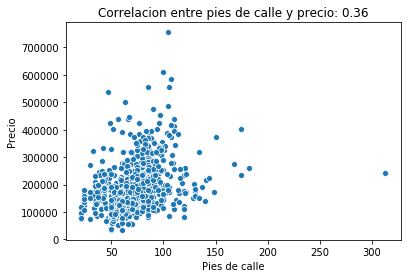

In [14]:
dataset = pd.DataFrame({'Pies de calle': pies_calle_n, 'Precio': precio})
cor = dataset.corr()
coefcorr_calle = cor.loc['Pies de calle','Precio']
print("Correlacion entre Pies lineales de calle conectados a la propiedad y precio")
print("Coeficiente: ", coefcorr_calle)
titulo = "Correlacion entre pies de calle y precio: " + str("%.2f" % round(coefcorr_calle, 2))

ax = sns.scatterplot(x="Pies de calle", y="Precio", data=dataset).set_title(titulo)

Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables con más potencial predictivo(la 2 que presentan mayor correlación).

y = el precio de venta real de cierta casa

x = cierta característica de cierta casa

Crear una función para entrenar un modelo de regresión lineal de una variable y = mx +b.
La función recibe como argumentos:
* vector con la variable independiente “x” ,
* vector con la variable dependiente “y”,
* un entero “epochs” que indica por cuantas iteraciones entrenar el modelo.
* un entero “imprimir_error_cada” , que nos indica cada cuantas iteraciones queremos imprimir a través de print : el número de iteración, el error del modelo en esa iteración, si imprimir_error_cada = 10, se despliega en pantalla el error en las iteraciones: 10,20,30,40,50
* escalar lr(learning rate): es usado como parte de la expresión matemática para actualizar en cada iteración los parámetros del modelo.

In [212]:
#Funcion para entrenamiento de modelo

def entrenar_modelo(x, y, epochs, imprimir_error_cada, lr):    
    #Matriz de valores x y 0
    vec_x = np.ones((len(x),2))
    vec_x[:,0] = x
    #Diccionario de return
    modelo_dic = {}
    m = 0
    b = 0
    v_errores = np.zeros(epochs)
    
    for i in range(0, epochs):
        lista_ite = [] 
        #Matriz de observacion
        observacion = np.column_stack((x, y))
        #Vector de parametros
        parametros = np.column_stack((m, b))
        
        #Calculo de yhat
        yhat = np.dot(np.squeeze(vec_x), np.squeeze(parametros))
        lista_ite.append(yhat)
        
        #Calculo de error
        error = ((y - yhat)**2) / 2    
        prom_error = np.average(error)
        
        #Agrega error a vector
        v_errores[i] = prom_error 
        
        y_res = yhat - y
        

        tempo_gradiente_m = y_res * x
        tempo_gradiente_b = y_res
        gradiente_m = np.average(tempo_gradiente_m)
        
        gradiente_b = np.average(tempo_gradiente_b)
        
        lista_ite.append(gradiente_m)
        lista_ite.append(gradiente_b)
        
        #para m
        m = (m - (lr * gradiente_m))
        #para b
        b = (b - (lr * gradiente_b))
        
        modelo_dic[i] = lista_ite
        
        if((i%imprimir_error_cada) == 0):
            print("Error", i, ": ", prom_error)
    
    return modelo_dic, v_errores



In [224]:
#Validaccion contra prueba de excel
x_prueba = np.asarray([65,80,68])
y_prueba = np.asarray([208.5, 181.5, 223.5])
dic_salida_exl, list_errores_exl = entrenar_modelo(x_prueba, y_prueba, 3, 1, 0.0001)
print("\nDiccionario de salida: ", dic_salida_exl, "\n\nErrores del modelo:", list_errores_exl)

Error 0 :  21061.125
Error 1 :  5542.5714866175
Error 2 :  1792.1806675481128

Diccionario de salida:  {0: [array([0., 0., 0.]), -14423.5, -204.5], 1: [array([ 93.7732 , 115.40845,  98.10025]), -7090.582999999999, -102.0727], 2: [array([139.87219677, 172.14332127, 146.32642167]), -3485.7149449299995, -51.71935342999999]} 

Errores del modelo: [21061.125       5542.57148662  1792.18066755]


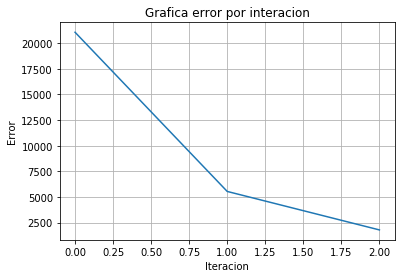

In [225]:
#Grafica de errores

indic = np.arange(0,len(list_errores_exl))
ax = plt.subplot()
ax.plot(indic, list_errores_exl)
ax.set(xlabel='Iteracion', ylabel='Error',
       title='Grafica error por interacion')
ax.grid()

plt.show()

In [226]:
#Modelo entrenamiento regresion lineal calidad de materiales - precio
#y = el precio de venta real de cierta casa
#x = la calidad de materiales de la casa

dic_salida_cal, list_errores_cal = entrenar_modelo(calidad_materiales, precio, 10, 2, 0.0001)
print("\nDiccionario de salida: ", dic_salida_cal, "\n\nErrores del modelo:", list_errores_cal)

Error 0 :  19409722053.22175
Error 2 :  19122686627.9757
Error 4 :  18840224439.06415
Error 6 :  18562262621.50268
Error 8 :  18288729471.258488

Diccionario de salida:  {0: [array([0., 0., 0., ..., 0., 0., 0.]), -1187947.67380137, -180590.27739726027], 1: [array([849.6223994 , 730.82763202, 849.6223994 , ..., 849.6223994 ,
       968.41716678, 730.82763202]), -1183190.2601517066, -179847.4482390832], 2: [array([1695.84032633, 1458.72653294, 1695.84032633, ..., 1695.84032633,
       1932.95411973, 1458.72653294]), -1178451.9106411757, -179107.59587492354], 3: [array([2538.66742337, 2183.70843891, 2538.66742337, ..., 2538.66742337,
       2893.62640783, 2183.70843891]), -1173732.5488749752, -178370.7083760185], 4: [array([3378.11727842, 2905.78503907, 3378.11727842, ..., 3378.11727842,
       3850.44951776, 2905.78503907]), -1169032.098764437, -177636.77386140666], 5: [array([4214.20342494, 3624.96797572, 4214.20342494, ..., 4214.20342494,
       4803.43887416, 3624.96797572]), -1164350

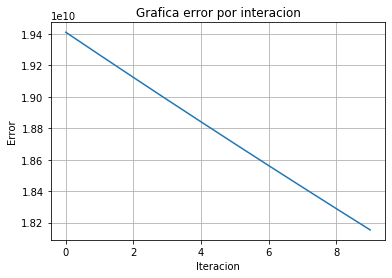

In [227]:
#Grafica de errores

indic = np.arange(0,len(list_errores_cal))
ax = plt.subplot()
ax.plot(indic, list_errores_cal)
ax.set(xlabel='Iteracion', ylabel='Error',
       title='Grafica error por interacion')
ax.grid()

plt.show()

In [228]:
#Modelo entrenamiento regresion lineal pies de construccion en el primer nivel - precio
#y = el precio de venta real de cierta casa
#x = los pies de construccion en el primer nivel

dic_salida_cons, list_errores_cons = entrenar_modelo(pies_primer_nivel, precio, 10, 2, 0.0001)
print("\nDiccionario de salida: ", dic_salida_cons, "\n\nErrores del modelo:", list_errores_cons)

Error 0 :  19409722053.22175
Error 2 :  8.070964516854702e+18
Error 4 :  3.734769746865342e+27
Error 6 :  1.7282327330733622e+36
Error 8 :  7.997249046405302e+44

Diccionario de salida:  {0: [array([0., 0., 0., ..., 0., 0., 0.]), -226960978.70804796, -180590.27739726027], 1: [array([19427877.83643664, 28642493.57198339, 20880428.10016815, ...,
       34089557.06097654, 38447207.85217106, 21765575.91712954]), 33287854037.71085, 26063462.061543804], 2: [array([-2.83001503e+09, -4.17228729e+09, -3.04160475e+09, ...,
       -4.96574873e+09, -5.60051787e+09, -3.17054223e+09]), -4882254304833.918, -3823092366.320257], 3: [array([4.15091336e+11, 6.11968588e+11, 4.46126174e+11, ...,
       7.28349230e+11, 8.21453744e+11, 4.65038028e+11]), 716069202649564.0, 560723892044.6649], 4: [array([-6.08804885e+13, -8.97560209e+13, -6.54322965e+13, ...,
       -1.06825301e+14, -1.20480725e+14, -6.82060546e+13]), -1.0502425129212642e+17, -82240106164048.66], 5: [array([8.92920365e+15, 1.31643127e+16, 9.59

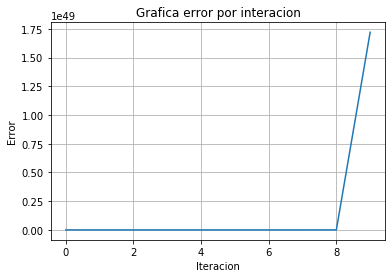

In [229]:
#Grafica de errores

indic = np.arange(0,len(list_errores_cons))
ax = plt.subplot()
ax.plot(indic, list_errores_cons)
ax.set(xlabel='Iteracion', ylabel='Error',
       title='Grafica error por interacion')
ax.grid()

plt.show()

“x” el número de iteración y en el eje “y” el error para esa iteración

Para cada una de las variables x seleccionadas, usar scikit-learn para entrenar un modelo de regresión lineal.

y = el precio de venta real de cierta casa

x = cierta característica de cierta casa

In [232]:
#Relacion entre cantidad de pies de construccion y costo: 0.62

#Usando scikit-learn

def entrenar_regresion_skl(x, y):
    #x = caracteristica
    #y = precio
    x_eval = x.reshape(-1,1)
    y_eval = y.reshape(-1,1)
    regre = LinearRegression()  
    regre.fit(x_eval, y_eval)

    b_inter = regre.intercept_[0]
    print("b: ", b_inter)

    m_pen = regre.coef_[0,0]
    print("m: ", m_pen)

    y_pred = regre.predict(x_eval)
    df = pd.DataFrame({'Datos reales': y_eval.flatten(), 'Prediccion': y_pred.flatten()})
    #df
    return df

df = entrenar_regresion_skl(pies_primer_nivel, precio)

df 

b:  30324.585174963664
m:  129.95124228715716


,Datos reales,Prediccion
0,208500.0,141562.848573
1,181500.0,194323.052941
2,223500.0,149879.728079
3,140000.0,155207.729013
4,250000.0,179118.757594
...,...,...
1163,108959.0,193803.247972
1164,194000.0,216414.764130
1165,233170.0,225511.351090
1166,245350.0,250461.989609


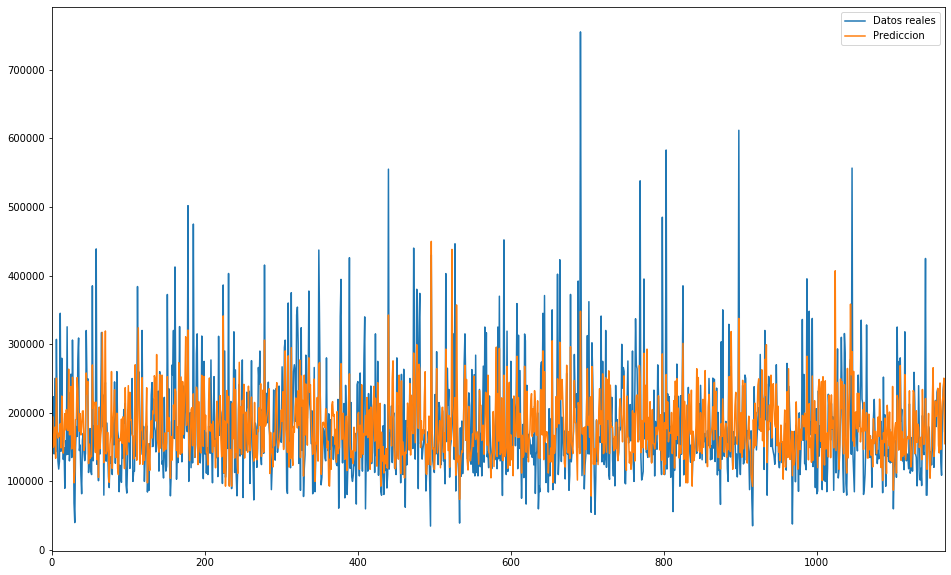

In [233]:
df.plot(figsize=(16,10))
plt.show()


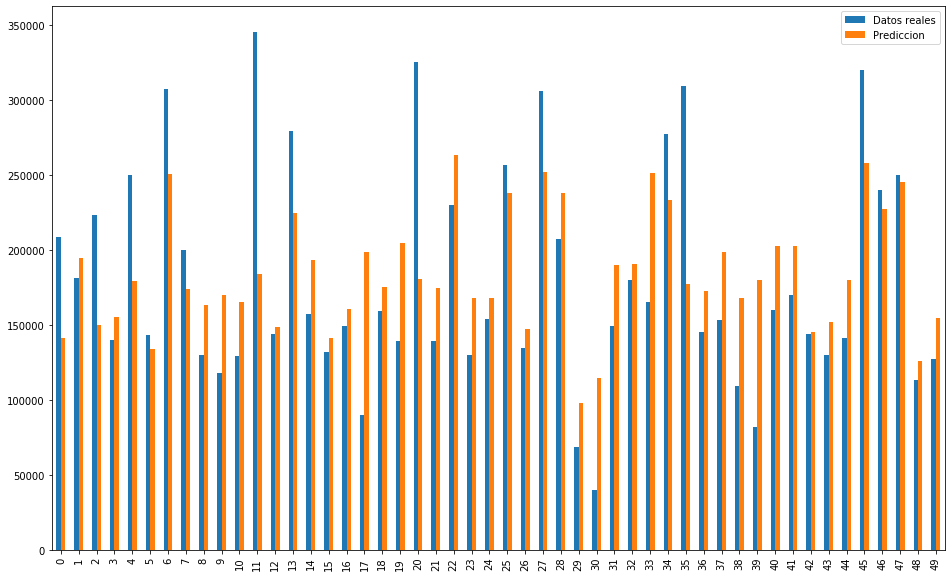

In [234]:
df1 = df.head(50)
df1.plot(kind='bar', figsize=(16,10))
plt.show()

In [235]:
df_ft = entrenar_regresion_skl(anio_construccion, precio)

df_ft

b:  -2590541.894382876
m:  1405.6306205832827


,Datos reales,Prediccion
0,208500.0,224936.238645
1,181500.0,186984.211890
2,223500.0,222124.977404
3,140000.0,101240.744034
4,250000.0,220719.346784
...,...,...
1163,108959.0,177144.797546
1164,194000.0,189795.473131
1165,233170.0,233370.022369
1166,245350.0,231964.391748


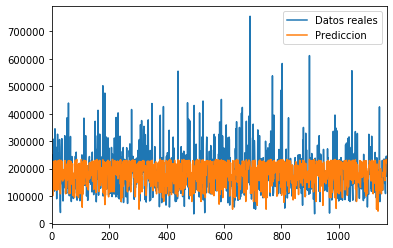

In [195]:
df_ft.plot()
plt.show()


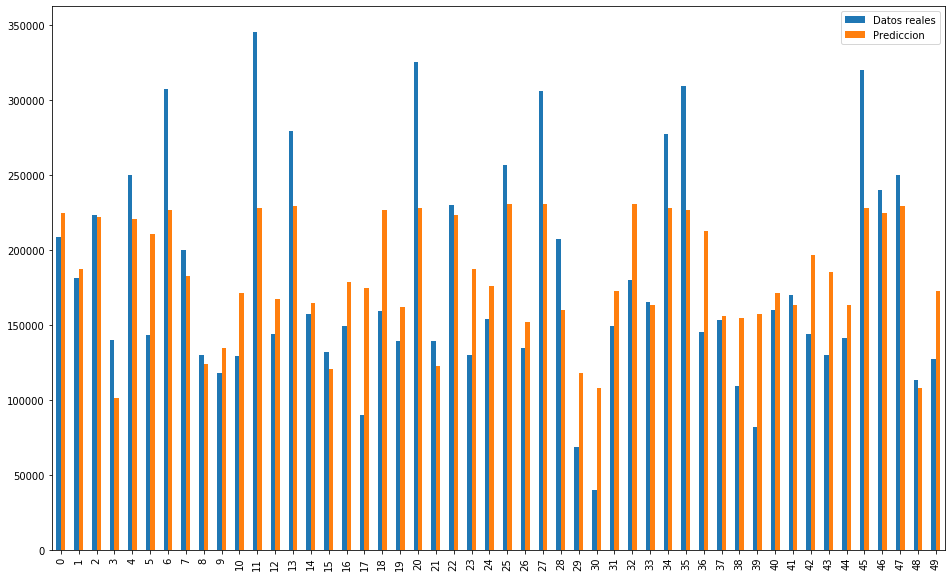

In [201]:
df_ft1 = df_ft.head(50)
df_ft1.plot(kind='bar', figsize=(16,10))
plt.show()